In [1]:
import sys
import os
PROJECT_ROOT = os.path.abspath("..")
sys.path.append(PROJECT_ROOT)

model_path = r"C:\Users\ransi\Downloads\500k_1m_timestamps\snapshot_500000(1)"


In [2]:
# import numpy as np
# # Testing if model runs

# from sb3_contrib import MaskablePPO
# from env.game_engine.rl_engine import index_to_card
# from env.tnf_env import TNFEnv
# from agents.rl_agent import RLAgent


# model_ppo = MaskablePPO.load(model_path)
# rlagent = RLAgent(model_ppo)
# env = TNFEnv(verbose=False)

# n = 5 # no. of games/episodes to run

# tot_reward = 0

# for episode in range(n):
#     obs, info = env.reset()
#     # print("trumps:", env.game.trump_suit)
#     # print("Agent hand:", [str(i) for i in env.game.hands[env.agent_id]])
#     curr_reward = 0
#     done = False

#     while not done:
#         action = rlagent.select_action(obs, info.get("action_mask"))
#         obs, r, done, _, info = env.step(int(action))
#         curr_reward += r
#         table = info.get("resolved_tricks")
#     tot_reward += curr_reward
#     # print(f"Episode {episode} finished with {tot_reward} value for rl_agent's team.")
    
    
# print("Average reward per game:", tot_reward/n)

In [3]:
# from training.train_ppo import train

# # Set device to 'cuda' for Colab's GPU
# train(
#     game_type='mixed', 
#     total_timesteps=500_000, 
#     device='cuda',
#     check_freq=20_000,
# )

In [2]:
from evaluation.eval_vs_baseline import evaluate

# evaluate(1000, False, model_path)


In [3]:
import os
import re
import matplotlib.pyplot as plt

# Get all zip files and sort them
files = []

folder_path1 = "../models/first_500k_timestamps"
for f in os.listdir(folder_path1):
    if f.endswith(".zip"):
        files.append(os.path.join(folder_path1, f[:-4]))

folder_path2 = "../models/500k_1m_timestamps"
for f in os.listdir(folder_path2):
    if f.endswith(".zip"):
        files.append(os.path.join(folder_path2, f[:-4]))

folder_path3 = "../models/1m-1_5m_timesteps"
for f in os.listdir(folder_path3):
    if f.endswith(".zip"):
        files.append(os.path.join(folder_path3, f[:-4]))
    
folder_path4 = "../models/1_5m-2m_timestamps"
for f in os.listdir(folder_path3):
    if f.endswith(".zip"):
        files.append(os.path.join(folder_path4, f[:-4]))
            
print(files)

['../models/first_500k_timestamps\\snapshot_100000', '../models/first_500k_timestamps\\snapshot_150000', '../models/first_500k_timestamps\\snapshot_200000', '../models/first_500k_timestamps\\snapshot_250000', '../models/first_500k_timestamps\\snapshot_300000', '../models/first_500k_timestamps\\snapshot_350000', '../models/first_500k_timestamps\\snapshot_400000', '../models/first_500k_timestamps\\snapshot_450000', '../models/first_500k_timestamps\\snapshot_50000', '../models/500k_1m_timestamps\\snapshot_100000 (1)', '../models/500k_1m_timestamps\\snapshot_150000 (1)', '../models/500k_1m_timestamps\\snapshot_200000 (1)', '../models/500k_1m_timestamps\\snapshot_250000 (1)', '../models/500k_1m_timestamps\\snapshot_350000 (1)', '../models/500k_1m_timestamps\\snapshot_400000 (1)', '../models/500k_1m_timestamps\\snapshot_400000(1)', '../models/500k_1m_timestamps\\snapshot_450000(1)', '../models/500k_1m_timestamps\\snapshot_50000 (1)', '../models/500k_1m_timestamps\\snapshot_500000(1)', '../mo

In [5]:
rewards_rand = []
rewards_greedy = []
rewards_mixed = []

for model_path in files:
    rewards_rand.append(evaluate(500, False, model_path, game_type='random'))
    rewards_greedy.append(evaluate(500, False, model_path, game_type='greedy'))
    rewards_mixed.append(evaluate(500, False, model_path, game_type='mixed'))
    print(f"Evaluated {model_path}")

Mean reward over 500 episodes: -0.404
Std: 170.29397166077254
Mean reward over 500 episodes: -9.02
Std: 165.57349908726337
Mean reward over 500 episodes: 9.184
Std: 171.13827784572334
Evaluated ../models/first_500k_timestamps\snapshot_100000
Mean reward over 500 episodes: 4.856
Std: 171.4350351124297
Mean reward over 500 episodes: -5.724
Std: 167.09493057540675
Mean reward over 500 episodes: -19.476
Std: 168.97963612222628
Evaluated ../models/first_500k_timestamps\snapshot_150000
Mean reward over 500 episodes: -9.764
Std: 170.17826037423228
Mean reward over 500 episodes: -1.444
Std: 166.5685770606209
Mean reward over 500 episodes: -1.924
Std: 169.64528353007637
Evaluated ../models/first_500k_timestamps\snapshot_200000
Mean reward over 500 episodes: -0.652
Std: 167.60959070411218
Mean reward over 500 episodes: -9.96
Std: 166.9251760520264
Mean reward over 500 episodes: -4.86
Std: 169.88387916456347
Evaluated ../models/first_500k_timestamps\snapshot_250000
Mean reward over 500 episodes: 

FileNotFoundError: [Errno 2] No such file or directory: '..\\models\\1_5m-2m_timestamps\\snapshot_300000.zip'

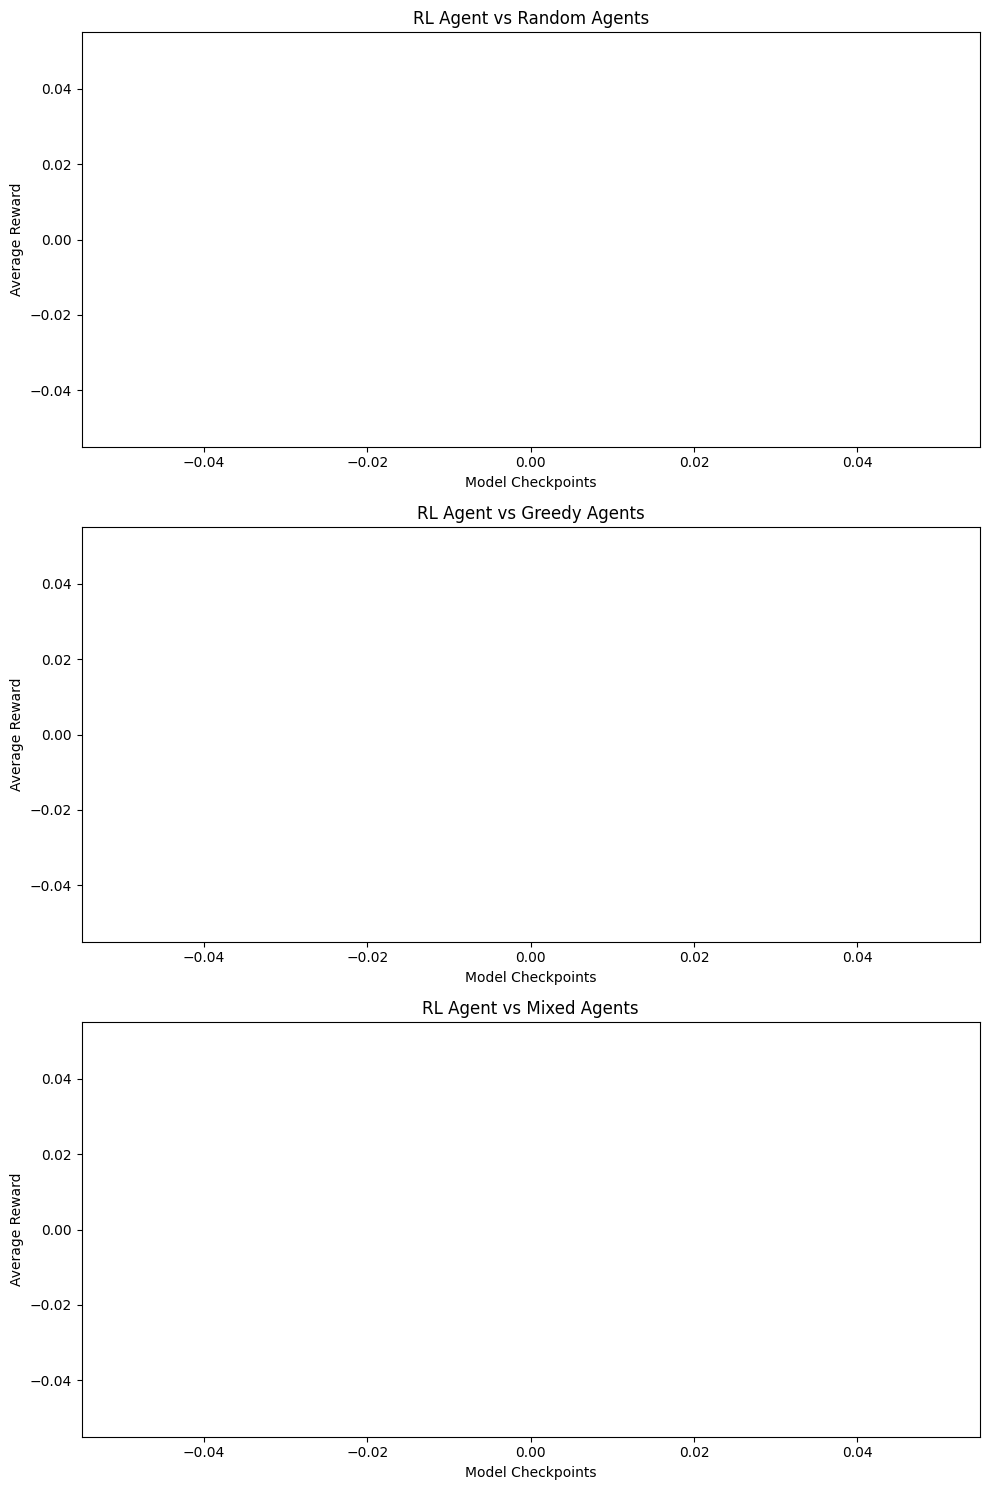

In [7]:
# Plotting results
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

axs[0].plot(rewards_rand, marker='o')
axs[0].set_title('RL Agent vs Random Agents')
axs[0].set_xlabel('Model Checkpoints')
axs[0].set_ylabel('Average Reward')
axs[1].plot(rewards_greedy, marker='o', color='orange')
axs[1].set_title('RL Agent vs Greedy Agents')
axs[1].set_xlabel('Model Checkpoints')
axs[1].set_ylabel('Average Reward')
axs[2].plot(rewards_mixed, marker='o', color='green')
axs[2].set_title('RL Agent vs Mixed Agents')
axs[2].set_xlabel('Model Checkpoints')
axs[2].set_ylabel('Average Reward')

plt.tight_layout()
plt.show()
